# Prediction for Future Terrorist attack based on GDP and population 
#### Group Members: 

Zhentao Lin, Binghong Yu

Kexin Quan, Chang Jing

Yajie Qi, Mufan Lei

## Introduction & background 

### Overview
Given the strong interest in finding how the world has changed in recent decades, our group decided to analyze terrorist attacks based on the dataset from world terrorist attacks in Kaggle and analyze terrorism incidents’ correlation of other factors like GDP and population. 

Our group focused mainly on the number of incidents, including its trend and its changing rate, from 1970 to 2018. 

We calculated the terrorism incidents increase rate, GDP increase rate and population increase rate of each country using linear regression and plotted these rates on the world map Geopandas library. 

Then we did linear regression again on these rates to find out the correlation and a possible function to predict the terrorism incident rates given GDP increase rate and population increase rate. 


### Research Question
(1) Are we moving towards a world with less terrorism based on the terrorism incidents from 1970 to 2018? 

(2) Do terrorist incidents occur more in a specific region or spread out throughout the world according to the region data? 

(3) How do different factors such as GDP and population affect/correlate with terrorist incidents?


### Background & Prior Work 
Terrorism refers to violence during peacetime(Terrorism, 2019). The increased use of suicide attacks from the 1980s onwards was typified by the September 11 attacks in New York City and Washington, D.C. in 2001. Since then, citizens started to pay close attention to terrorism threatens(Terrorism, 2019).

Breaking news of Abu Bakr al-Baghdadi, leader of the ISIS was confirmed dead at the age of 48. However, his death did not mean the end of the trouble brought by ISIS and other terrorism (Friedman, 2019). “Many inside the ISIS prison are missing eyes or limbs, some are bone-thin from sickness.”(Hubbard,2019) More than 150 children lost their families in Syria and “have no idea where their relatives are or what the future holds.”(Hubbard,2019) It took much longer than we thought to let society or victims recover from a terrorist attack. Meanwhile, the public is still haunted by the fear of terrorist attacks and the grief of losing someone they love.

Since the consequence of terrorist attacks is so devastating, we thought it would bring us valuable information as we used databases from Kaggle to analyze the relationship of different factors(including location, time) and terrorist incidents. With the GDP and population growth in different regions these years, we aim to measure the latest trend of terrorism and quantify peace on the world map in order to make a prediction and gain a better understanding of the correlations among several factors and terrorism.

#### Citations:

Friedman, T. L. (2019, October 27). Al-Baghdadi Is Dead, but the Troubles of the
Middle East Are Far From Over. Retrieved from	https://www.nytimes.com/2019/10/27/opinion/trump-al-baghdadi-dead.html.

Hubbard, B., & Prickett, I. (2019, October 23). 'What Is Going to Happen to Us?'
Inside ISIS Prison, Children Ask Their Fate. Retrieved from
https://www.nytimes.com/2019/10/23/world/middleeast/what-is-going-to-happen-to-us-inside-isis-prison-children-ask-their-fate.html.

Terrorism. (2019, October 16). Retrieved from
https://en.wikipedia.org/wiki/Terrorism


### Hypothesis
We expect that we are moving towards a world with less terrorism. The reason is that nowadays we have more organizations that work against terrorism attacks, more advanced techniques to investigate suspects, more surveillance in public areas and more security checks at airports and public areas. With rasing awareness of the devastating consequence brought by the terrorist attack, society is more prepared and experienced on how to handle and take precautions against them.

We also expect that terrorism attacks get more targeted to a specific region like the US and West Europe. The reason is that we saw many terrorism news reports happening in developed countries in recent years, such as November 2015 Paris attacks and 2017 London Bridge attack. This breaking news makes people believe that terrorist organizations get more targeted to these global economic centers.



## Datasets

### (1) Dataset: Global Terrorism Database from Kaggle 

#### Link to dataset: https://www.kaggle.com/START-UMD/gtd

#### Number of observations: 
There are 191464 data points(rows) and 135 columns. Each data point represents a terrorism incident happening between 1970 and 2017. For each data point(incident), there are 135 property values.

#### Description: 
The dataset is maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland. So among these columns, we found these variables valuable to explore and analyze:(#:number; 0/1: boolean value; txt: text value)

Time-related: iyear(#)

Location related: country(#), country_text(txt), region(#), region_text(txt), provstate(txt), city(txt), latitude(#), longitude(#)


### (2) Dataset: World Development Indicators from World Bank
#### Link to dataset: https://databank.worldbank.org/source/world-development-indicators/preview/on
#### Number of observations: 
9338 rows (54 factors of 183 countries) 

53 columns 

#### Description:
These datasets contain 53 columns including 'Series Name', 'Series Code', 'Country Name', 'Country Code', and 49 years from 1970 to 2018, where 'Series Name' means all different factors for each country including ‘Population Total’ and ‘GDP Total’. For each factor, the dataset contains 183 countries’ data. In terms of our analysis, we extracted the GDP and the population of 183 countries from the dataset. The GDP data from more than 61 countries are missing, so we replaced the missing data by the average GDP of other countries for simplicity. Since there was not a significant lack of data for the population of the countries, no modification was needed and we directly used that column of data.

## Data Analysis

### Data Cleaning & Pre-processing

In [ ]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# map
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# remove warnings
import warnings
warnings.filterwarnings('ignore')

#### load terrorism incidents data from global terrorism db called df
#### load country data from World Bank (GDP,Population,...) called country_data_df

In [143]:
df = pd.read_excel('globalterrorismdb_0919dist.xlsx') # (191464, 135)
country_data_df = pd.read_csv('country_data.csv')  # (9338, 53)

#### data clean country_data_df

(1)drop useless columns 'Series Code' and 'Country Code'; 

(2)rename columns: (a)e.g. '1970 [YR1970]' --> 1970; (b)'Series Name' --> 'type'; (c) 'Country Name' --> 'country'

(3)rename some of the country names of country_data_df to be consistent with df

In [144]:
# drop columns
country_data_df.drop(['Series Code','Country Code'], axis=1, inplace=True)

In [145]:
# rename columns
new_col_2 = list(range(1970, 2019))
for i in range(0, len(new_col_2)): 
    new_col_2[i] = str(new_col_2[i]) 
new_col_1 = ['type', 'country']
new_col = new_col_1 + new_col_2
country_data_df.columns = new_col

In [146]:
country_data_df = country_data_df[country_data_df['country'].notnull()]

In [147]:
# rename country names 

country_data_df['country'].replace('Bosnia and Herzegovina','Bosnia-Herzegovina', inplace=True)
country_data_df['country'].replace('Brunei Darussalam','Brunei', inplace=True)
country_data_df['country'].replace('Bahamas, The','Bahamas', inplace=True)
country_data_df['country'].replace('Congo, Rep.','Republic of the Congo', inplace=True)
country_data_df['country'].replace('Egypt, Arab Rep.','Egypt', inplace=True)
country_data_df['country'].replace('Gambia, The','Gambia', inplace=True)
country_data_df['country'].replace('Hong Kong SAR, China','Hong Kong', inplace=True)
country_data_df['country'].replace('Iran, Islamic Rep.','Iran', inplace=True)
country_data_df['country'].replace("Cote d'Ivoire",'Ivory Coast', inplace=True)
country_data_df['country'].replace('Kyrgyz Republic','Kyrgyzstan', inplace=True)
country_data_df['country'].replace('Lao PDR','Laos', inplace=True)
country_data_df['country'].replace('Macao SAR, China','Macau', inplace=True)
country_data_df['country'].replace('North Macedonia','Macedonia', inplace=True)
country_data_df['country'].replace('Korea, Dem. People’s Rep.','North Korea', inplace=True)
country_data_df['country'].replace('Russian Federation','Russia', inplace=True)
country_data_df['country'].replace('Korea, Rep.','South Korea', inplace=True)
country_data_df['country'].replace('Eswatini','Swaziland', inplace=True)
country_data_df['country'].replace('Syrian Arab Republic','Syria', inplace=True)
country_data_df['country'].replace('Venezuela, RB','Venezuela', inplace=True)
country_data_df['country'].replace('Yemen, Rep.','Yemen', inplace=True)
country_data_df['country'].replace('Congo, Dem. Rep.','Democratic Republic of the Congo', inplace=True)
country_data_df['country'].replace('Timor-Leste','East Timor', inplace=True)

#### data clean df into a new data frame called df_clean

(1) select useful columns

(2) standardize some contry in df (these countries change name)

(3) drop missing countries in df + four countries that change over time 

In [148]:
# select useful columns 
df = df[['iyear','imonth','iday','country','country_txt','region','region_txt','provstate','city','latitude','longitude','success','attacktype1','attacktype1_txt','weaptype1','weaptype1_txt','weapsubtype1','weapsubtype1_txt','suicide','targtype1','targtype1_txt','targsubtype1','targsubtype1_txt','natlty1','natlty1_txt','gname','motive','nperps','nperpcap','claimed','nkill','nkillus','nkillter','nwound','nwoundus','property','propextent','propvalue','ishostkid','nhostkid','nhostkidus','ransom','ransomamt','hostkidoutcome']]

In [149]:
# standardize some contry in df  (these countries change name)
df['country_txt'].replace("People's Republic of the Congo",'Republic of the Congo', inplace=True)
df['country_txt'].replace("Zaire",'Democratic Republic of the Congo', inplace=True)
df['country_txt'].replace("East Germany (GDR)",'Germany', inplace=True)
df['country_txt'].replace("West Germany (FRG)",'Germany', inplace=True)
df['country_txt'].replace("South Yemen",'Yemen', inplace=True)
df['country_txt'].replace("North Yemen",'Yemen', inplace=True)
df['country_txt'].replace("South Vietnam",'Vietnam', inplace=True)
df['country_txt'].replace("Rhodesia",'Zimbabwe', inplace=True)
df['country_txt'].replace("West Bank and Gaza Strip",'West Bank and Gaza', inplace=True)

In [150]:
# drop missing countries in df + four countries that change over time 
# only 442 out of 191464, trivial 
missing_country = ['Falkland Islands', 'French Guiana', 'Guadeloupe', 'Martinique', 'Taiwan', 'Vatican City', 'New Hebrides', 'Western Sahara', 'International', 'Wallis and Futuna']
changing_country = ['Czechoslovakia', 'Serbia-Montenegro', 'Soviet Union', 'Yugoslavia']
need_to_drop_countries = missing_country + changing_country

df_cleaned = df[~df['country_txt'].isin(need_to_drop_countries)]
df_cleaned.shape  # new df 

(191022, 44)

Data are all ready to go! 

### Data Visualization 

#### Visualization(1) 

plot number of terrorism incidents over year, x axis is year, y axis is number of terrorism incidents

#### Interpretation: 
As shown in the graph, #incidents has increased dramatically after 2010. This trend makes us curious about what's happening. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99b5815eb8>]],
      dtype=object)

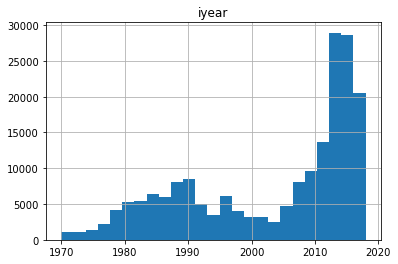

In [151]:
# Visualization(1)
df_cleaned[['iyear']].hist(bins=25)

In [154]:
# process nationality to dictionary 
nationality_codes = []
nationality_txt = []

filepath = 'nationality_dict.txt'
f = open(filepath, "r", encoding='utf-8-sig')
for x in f:
    tmp_list = x.split('=')
    tmp_code = int(tmp_list[0].strip())
    tmp_txt = tmp_list[1].strip()
    nationality_codes.append(tmp_code)
    nationality_txt.append(tmp_txt)
f.close()

nationality_dict = dict(zip(nationality_codes, nationality_txt))
nationality_map_tmp = range(225)
nationality_idx_map_dict = dict(zip(nationality_map_tmp, nationality_codes)) 

# process country to dictionary from nationality dict 
import copy
country_dict = copy.deepcopy(nationality_dict)
country_code = copy.deepcopy(nationality_codes)

# delete only countries that only appear as target/victim descriptors in the GTD.
to_del_countries_key_list = [24, 79, 114, 125, 126, 134, 152, 163, 169, 192, 206, 212, 216, 225, 233, 238, 334, 351, 520, 999, ]
for i in to_del_countries_key_list: 
    del country_dict[i]
    country_code.remove(i)

#### Visualization(2) 
plot terrorism incidents rate of each country on a world map

##### Prep: 

(a)fit linear regression for each country(get #incident in each country each year + compute incidents rate for each country)

(b)preprocess the geopandas world map to resolve some country difference 

(c)normalize the incident rate to show better visualizaiton 

##### Interpretation: 

As shown by the graph, it shows that for most of the countries, the terrorism incidents rates are actually decreasing (as blue in graph), only a few countries in South Asia, the terrorism incidents rates are super high. This explains that the increase of incidents shown in Visualization(1) may just be driven by a few countries/regions. 



In [155]:
# fit linear regression for each country 
# number of incidents = a + b * iyear

In [156]:
# get #incident in each country in each year

clean_country_list = list(country_data_df['country'].unique())

# 183 * 49 list 
# each entry store #incident in each country in each year 
# res[i] correspond to ith country in clean_country_list
incidents_res = []
for country in clean_country_list:
    for year in range(1970, 2019):
        data_year = df_cleaned[df_cleaned['iyear'] == year]
        if year == 1970:
            incidents_res.append([])
        incidents_res[-1].append(sum(data_year['country_txt'] == country))

In [157]:
# compute incidents rate for each country 

incidents_rate = []  # 183 * 2; each element is two coefficient for each country 
                     # #incident = intercept + coefficient * iyear
for i in range(len(incidents_res)):
    test1 = pd.DataFrame(list(zip(list(range(1970, 2019)), incidents_res[i])), columns =['year', 'number'])
    outcome, predictors = patsy.dmatrices('number ~ year', test1)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    
    incidents_rate.append([res.params[0], res.params[1]])

In [158]:
# (b)preprocess the geopandas world map to resolve some country difference 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.name.replace("Bosnia and Herz.", "Bosnia-Herzegovina", inplace=True)
world.name.replace("Côte d'Ivoire", "Ivory Coast", inplace=True)
world.name.replace("Dem. Rep. Congo", "Democratic Republic of the Congo", inplace=True)
world.name.replace("Dominican Rep.", "Dominican Republic", inplace=True)
world.name.replace("United States of America", "United States", inplace=True)
world.name.replace("eSwatini", "Swaziland", inplace=True)
world.name.replace("Timor-Leste", "East Timor", inplace=True)
world.name.replace("Central African Rep.", "Central African Republic", inplace=True)
world.name.replace("Slovakia", "Slovak Republic", inplace=True)
world.name.replace("S. Sudan", "South Sudan", inplace=True)
world.name.replace("Solomon Is.", "Solomon Islands", inplace=True)
world.name.replace("Eq. Guinea", "Equatorial Guinea", inplace=True)
world.name.replace("Czechia", "Czech Republic", inplace=True)
world.name.replace("Congo", "Republic of the Congo", inplace=True)


world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.name!="Falkland Is.") 
              & (world.name!="Fr. S. Antarctic Lands")
             & (world.name!="Greenland") & (world.name!="Mongolia") & (world.name!="N. Cyprus")
             & (world.name!="Oman") & (world.name!="Palestine") & (world.name!="Puerto Rico")
             & (world.name!="Somaliland") & (world.name!="Taiwan") & (world.name!="W. Sahara")
             & (world.name!="Afghanistan") & (world.name!="Iraq")   # taking these two out because their increase rate is too crazy
             ]

world.index = list(range(world.shape[0]))

In [159]:
# (c)normalize the incident rate to show better visualizaiton

old_min = min([i[1] for i in incidents_rate])
old_range = max([i[1] for i in incidents_rate]) - old_min
new_min = -5
new_range = 5 + 0.9999999999 - new_min
normalized_incidents_rate = [int((n - old_min) / old_range * new_range + new_min) for n in [i[1] for i in incidents_rate]]

# mapping between country and incidents rate  
country_incident_rate_key = clean_country_list
country_incident_rate_value = [i[1] for i in incidents_rate]
country_incident_rate_dict = dict(zip(country_incident_rate_key, normalized_incidents_rate)) 

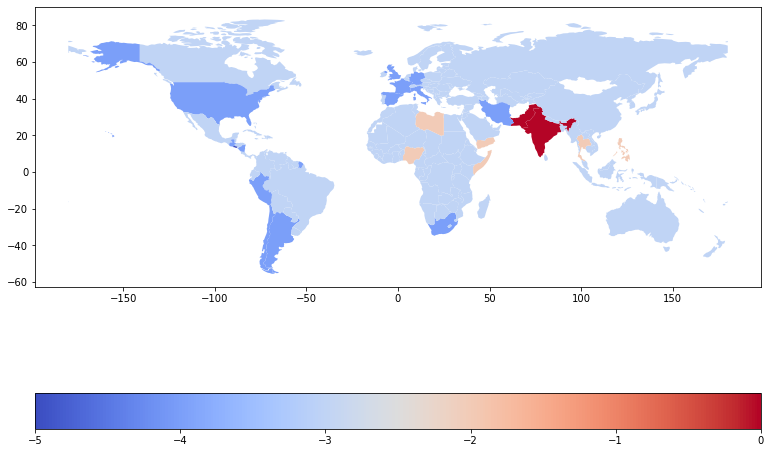

In [160]:
# Visualization(2): 
# generate world map based on incidents increase rate 
# (red to blue: red means increasing, blue means decreasing)

world['incident_rate'] = [0.0 for i in range(world.shape[0])]
for i in range(world.shape[0]):
    world['incident_rate'][i] = country_incident_rate_dict[world['name'][i]]
    
world.plot(column='incident_rate',cmap="coolwarm", legend=True,legend_kwds={'orientation': "horizontal"}, figsize=(13,13));



Explore what factors may correlate with incident rate, we choose population and GDP

#### Visualization(3-4) 
plot gdp/population increase rate of each country on a world map

##### Prep: 

(a) get data of gdp and population from country_data_df

(b) preprocess the two new dataframes: reset the index of both dataframe + check for missing gdp and populations + deal with missing data 

(c) fit population linear regression for each country + fit gdp linear regression for each country

##### Interpretation: 

From Visualization(3), we can see that, except for China, for most of the countries, the population increase rates are decreasing (as blue in graph), only a few countries in South Asia, the population increase rates are super high. This world map looks quite similar with the one in Visualization(1). It looks like there are some correlations between incidents rate and population increase rate. 

From Visualization(4), we can see that, the trend is quite the opposite of Visualization(3). United States has shown a great increase of gdp rate, then China has fairly good gdp increase rate, the rest of the countries donot have much gdp increase rate over the year. 

In [162]:
# fit population linear regression for each country  
# fit gdp linear regression for each country 

# population = a + b * iyear
# gdp = a + b * iyear

In [163]:
# (a) get data of gdp and population from country_data_df 
country_data_df_GDP = country_data_df[country_data_df['type'] == 'GDP (current US$)']
country_data_df_population = country_data_df[country_data_df['type'] == 'Population, total']

In [164]:
# (b)preprocess the two new dataframes: 

# reset the index of both dataframe 
country_data_df_GDP.index = list(range(country_data_df_GDP.shape[0]))
country_data_df_population.index = list(range(country_data_df_population.shape[0]))

In [165]:
# check for missing gdp and populations + deal with data decision 
count_missing_population_list = [0] * country_data_df_population.shape[0]
for i in range(183):
    for j in country_data_df_population.columns:
        if country_data_df_population[j][i] == '..':
            count_missing_population_list[i] += 1 ;
            
count_missing_gdp_list = [0] * country_data_df_population.shape[0]
for i in range(183):
    for j in country_data_df_population.columns:
        if country_data_df_GDP[j][i] == '..':
            count_missing_gdp_list[i] += 1 ;
            
# no countries has more than 20 missing population data 

# How to deal with these missing data: 
# we should be good to plot without dropping rows 
len([i for i in count_missing_population_list if i >= 20])

# 61 countries has more than 10 missing gdp data 
# 34 countries has more than 20 missing gdp data 
# 7 countries has more than 30 missing gdp data 
# 2 countries has more than 40 missing gdp data  
# 1 country do not have any gdp data at all  

# How to deal with these missing data: 
# in terms of simplicity, we will fill the nan data with mean 
# of existing data for the country 
len([i for i in count_missing_gdp_list if i >= 49])

1

In [166]:
# (c) fit population linear regression for each country 

population_rate = []  # 183 * 2; each element is two coefficient for each country 
                     # population = intercept + coefficient * iyear
for i in range(len(clean_country_list)):
    temp = country_data_df_population[country_data_df_population['country'] == clean_country_list[i]].loc[:, ~country_data_df_population.columns.isin(['type', 'country'])]
    population_list = temp.iloc[0].tolist()
    population_list_2 = [int(i) for i in population_list if i != '..']
    population_list = [int(i) if i != '..' else int(np.mean(population_list_2)) for i in population_list]
    test2 = pd.DataFrame(list(zip(list(range(1970, 2019)), population_list)), columns =['year', 'population'])

    outcome, predictors = patsy.dmatrices('population ~ year', test2)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit() 
    
    population_rate.append([res.params[0], res.params[1]])

In [167]:
# (c) fit gdp linear regression for each country

gdp_rate = []       # 183 * 2; each element is two coefficient for each country 
                     # gdp = intercept + coefficient * iyear
for i in range(len(clean_country_list)):
    temp = country_data_df_GDP[country_data_df_GDP['country'] == clean_country_list[i]].loc[:, ~country_data_df_GDP.columns.isin(['type', 'country'])]
    gdp_list = temp.iloc[0].tolist()
    gdp_list_2 = [float(i) for i in gdp_list if i != '..']
    gdp_list = [float(i) if i != '..' else float(np.mean(gdp_list_2)) if len(gdp_list_2) > 0 else 0.0 for i in gdp_list]
    test2 = pd.DataFrame(list(zip(list(range(1970, 2019)), gdp_list)), columns =['year', 'gdp'])

    outcome, predictors = patsy.dmatrices('gdp ~ year', test2)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    
    gdp_rate.append([res.params[0], res.params[1]])
    

In [168]:
# mapping between country and population rate  
country_population_rate_key = clean_country_list
country_population_rate_value = [i[1] for i in population_rate]
country_population_rate_dict = dict(zip(country_population_rate_key, country_population_rate_value)) 

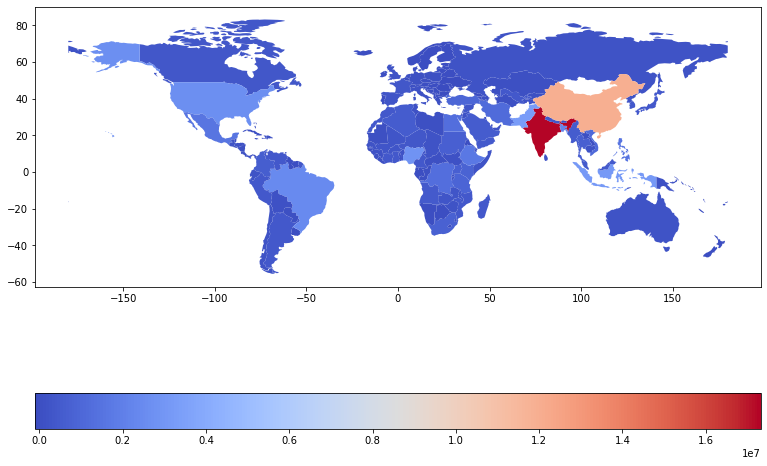

In [169]:
# Visualization(3): 
# plot population increase rate of each country on a world map
# (red to blue: red means increasing, blue means decreasing)

world['population_rate'] = [0.0 for i in range(world.shape[0])]
for i in range(world.shape[0]):
    world['population_rate'][i] = country_population_rate_dict[world['name'][i]]
    
world.plot(column='population_rate',cmap="coolwarm", legend=True,legend_kwds={'orientation': "horizontal"}, figsize=(13,13));



In [170]:
# mapping between country and population rate  
country_gdp_rate_key = clean_country_list
country_gdp_rate_value = [i[1] for i in gdp_rate]
country_gdp_rate_dict = dict(zip(country_gdp_rate_key, country_gdp_rate_value)) 

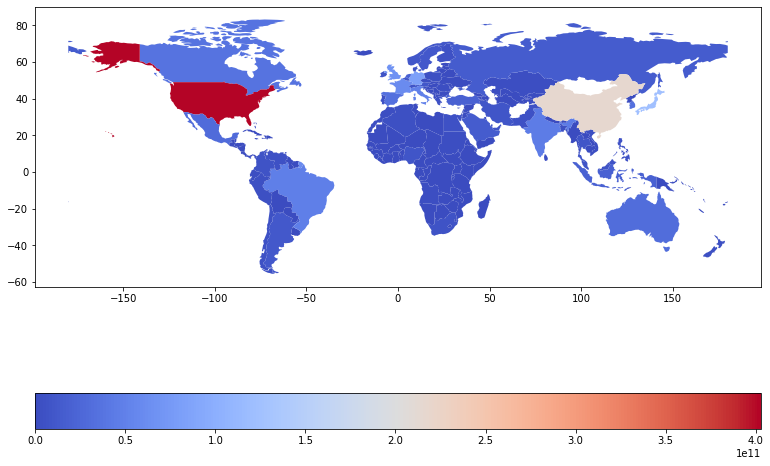

In [171]:
# Visualization(4):
# plot population increase rate of each country on a world map
# (red to blue: red means increasing, blue means decreasing)

world['gdp_rate'] = [0.0 for i in range(world.shape[0])]
for i in range(world.shape[0]):
    world['gdp_rate'][i] = country_gdp_rate_dict[world['name'][i]]
    
world.plot(column='gdp_rate',cmap="coolwarm", legend=True,legend_kwds={'orientation': "horizontal"}, figsize=(13,13));



### Data analysis & Results

####  What was done: 

Now, we want to look at the correlation of population rate and incidents rate, gdp rate and incidents rate, all three rates together

We did a total of 3 analysis: 

(1) correlation between incident rate and population rate 

(2) correlation between incident rate and gdp rate 

(3) correlation between incident rate, population rate and gdp rate 

In [172]:
# (1) fit linear regression of incident rate and population rate 
# incident rate = a + b * population rate

In [178]:
test4 = pd.DataFrame(list(zip([i[1] for i in incidents_rate], [i[1] for i in population_rate])), columns =['incident_rate', 'population_rate'])

outcome, predictors = patsy.dmatrices('incident_rate ~ population_rate', test4)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          incident_rate   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000165
Time:                        06:49:09   Log-Likelihood:                -547.81
No. Observations:                 183   AIC:                             1100.
Df Residuals:                     181   BIC:                             1106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6247      0.372      1.678      0.095      -0.110       1.359
population_rate  8.539e-07   2.22e-07      3.847      0.000    4.16e-07    1.29e-06
==============================================================================
Omnibus:                      285.062   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31212.673
Skew:                           7.145   Prob(JB):                         0.00
Kurtosis:                      65.364   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
# (2) fit linear regression of incident rate and gdp rate 
# incident rate = a + b * gdp rate

In [180]:
test5 = pd.DataFrame(list(zip([i[1] for i in incidents_rate], [i[1] for i in gdp_rate])), columns =['incident_rate', 'gdp_rate'])

gdp_outcome, gdp_predictors = patsy.dmatrices('incident_rate ~ gdp_rate', test5)
gdp_mod = sm.OLS(gdp_outcome, gdp_predictors)
gdp_res = gdp_mod.fit()

gdp_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          incident_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4535
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.502
Time:                        06:49:10   Log-Likelihood:                -554.77
No. Observations:                 183   AIC:                             1114.
Df Residuals:                     181   BIC:                             1120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0678      0.384      2.781      0.006       0.310       1.825
gdp_rate   -6.928e-12   1.03e-11     -0.673      0.502   -2.72e-11    1.34e-11
==============================================================================
Omnibus:                      275.742   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24411.902
Skew:                           6.819   Prob(JB):                         0.00
Kurtosis:                      57.914   Cond. No.                     3.84e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
# (2) fit linear regression of incident rate, population rate and gdp rate 
# incident rate = a + b * population rate + c * gdp rate

In [182]:
test6 = pd.DataFrame(list(zip([i[1] for i in incidents_rate], [i[1] for i in population_rate], [i[1] for i in gdp_rate])), columns =['incident_rate', 'population_rate', 'gdp_rate'])

gdp_population_outcome, gdp_population_predictors = patsy.dmatrices('incident_rate ~ population_rate + gdp_rate', test6)
gdp_population_mod = sm.OLS(gdp_population_outcome, gdp_population_predictors)
gdp_population_res = gdp_population_mod.fit()

gdp_population_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          incident_rate   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     10.63
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.32e-05
Time:                        06:49:10   Log-Likelihood:                -544.78
No. Observations:                 183   AIC:                             1096.
Df Residuals:                     180   BIC:                             1105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7547      0.371      2.034      0.043       0.023       1.487
population_rate  1.087e-06   2.39e-07      4.557      0.000    6.16e-07    1.56e-06
gdp_rate        -2.619e-11   1.06e-11     -2.460      0.015   -4.72e-11   -5.18e-12
==============================================================================
Omnibus:                      291.177   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34280.916
Skew:                           7.409   Prob(JB):                         0.00
Kurtosis:                      68.393   Cond. No.                     3.91e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation of the output: 

Given the three OLS results above, we can see that population rate itself has strong correlation with incident rate given the first linear regression result: p value is 0.000 shown in the summary, which is definitely smaller than 0.05. 

GDP rate itself does not have statiscal correlation with incidents rate given the second linear regression result: p value is 0.502 which is super large, so GDP rate is unrelated to incident increase rate  on its own. 

In the last linear regression, we combine GDP increase rate and Population increase rate together to make a linear regression with regard to terrorism incidents increase rate. From the result we can see that both GDP increase rate and Population increase rate has statistically significant correlation with terrorism incidents rate, where p values are 0.000 and 0.015. 

In addition, we can also see that terrorism incidents rate has a positive correlation with population rate and negative correlation with GDP rate. 

We got the formula to calculate the terrorism incidents rate if we are given population increase rate and GDP increase rate of a country: 

incidents rate = 0.7547 + 1.087e-06 * population_rate + (-2.619e-11) * gdp_rate

To conclude, we find that terrorism rate is positively related to Population rate and unrelated to GDP growth unless we also factor in Population growth. 

## Privacy/Ethics Consideration 

Terrorism incidents data from GTD has specified that 'events that are only documented by distinctly biased or unreliable sources are not included in the GTD, however the GTD does include certain information from potentially biased sources, such as perpetrator claims of
responsibility or details about the motive of the attack.'. So there might still be some potential bias for the data itself. But since we did not use those columns related to perpetrator and motive of the attack, we should be fine. 

There are several ethical issues that we need to consider when selecting and analyzing secondary data. To further investigate the relationship between terrorist attacks and their corresponding regions, our group proposes several factors/assumptions which might influence this correlation, such as economic level(GDP), population rate, religious belief, as well as political concerns, etc.. However, our group believed that this might turn out to be a sensitive topic as the result of data contains information that could be related to specific religions or ethnic backgrounds. Even though there might be a positive correlation between certain religions and the number of terrorist attacks, we are still uncertain whether religion is one of the most influential factors. Therefore, after careful consideration, we tend to solely work on the relationship among other categories like GDP, or populations, in order to make future predictions.

In terms of our analysis, we only do analysis on the country-level such as global terrorism trend and how do GDP and population correlate with terrorism rate. We use GDP and population data collected from World Bank, which is a neutral organization. So we do not expect potential bias or ethical/privacy issue in our current data analysis. 

## Conclusion & Discussion 

#### Observation & Trends

Global terrorism has shown a general increasing pattern since 1970. The incidents number experienced a fall between 1990 and 2010, but it also presented rapid growth after 2010. However, most countries in the world experienced decreasing terrorist incidents, while some African countries went through slight increasing terrorist incidents. Surprisingly, these economic centers such as US and West Europe are not targeted as much as we hypothesized, given that these countries’ terrorism incidents rates are not increasing. Furthermore, countries such as Afghanistan, India, Nepal, Pakistan in South Asia underwent rapid growth from 1970 to 2018 drive the huge overall increase.

According to the world maps of population and terrorist attacks, the regions marked by a red color are overlapped, inferring that the population has a positive correlation with the incidents worldwide. In order to validate our assumption from the data visualization presented, we analyzed the relationship through regression and concluded that those few countries where terrorism is increasing are the ones with the fastest-growing population.

Additionally, based on the world maps, the changing rates of GDP do not match the changing rates of incidents. Thus, GDP did not present a significant correlation with the terrorist attacks.

We notice that the terrorism rates are unrelated to GDP growth unless we take the population growth into consideration. After combining the three factors, we perceive the relationship Incidents rate = 0.7547 + 1.087e-06 population_rate + (-2.619e-11) gdp_rate. Therefore, based on the formula, we could predict future terrorist attacks. 

#### Limitations
Although the above analysis shows the correlation between the incidence rate of terrorism versus population(and GDP), it remains unclear whether terrorism is a factor or a result of these economic and social data. Because there may be more factors that contribute to the positive correlation between population and terrorists.

In the dataset from the World Bank for the countries, there were 61 countries lacking more than 10 GDP data, among which 34 countries had more than 20 missing GDP data. This also casts a shadow on our prediction, especially in investigating the correlation between economic level and terrorist attack incidents, in that we substituted the missing data with the mean GDP of that country in other years. If there was any outlier, or extreme value, in the missing data, the results of the correlation and regression can be drastically affected. Also, the missing population data for some countries were ignored in the process of data visualization. In this circumstance, more elaborate data is needed in order to perform a more accurate prediction.


Our group only investigated the incident of the terrorist attack. Detailed information and research on terrorist attacks including the victim number, weapon types, as well as fatalities damage are expected to be considered for further investigation. Thus, the prediction that our group has made was limited.   

Another limitation of the analysis is that we believe some factors contribute to terrorist attacks, but we failed to collect sufficient datasets for those factors. For example, our group previously assumed that the education level could potentially affect the number of terrorist attacks. However, after careful consideration, we believe it is hard to show the education level in numbers.

#### Potential Future Work
According to the World Map, there are only a few countries that experience growth in terrorism rates. Therefore, the ways in which these countries differ in the economy and social structures from other countries are worth studying.

More analysis of global data and potential economic and social factors that may account for the rapid growth after 2010 are needed.

The reason behind the rapid growth in global terrorism rates after 2010 and what may contribute to this growth remains unknown. Future work on analyzing the specific countries and big events that occurred particularly during this time period, in addition to how they might contribute to the terrorism rates are needed.
